In [1]:
import sys
import os
sys.path.append(os.path.abspath('/home/kinga/mnt2'))
sys.path.append(os.path.abspath('/home/kinga/mnt3'))
sys.path.append(os.path.abspath('/home/kinga/mnt4'))
sys.path.append(os.path.abspath('/home/kinga/mnt5'))
sys.path.append(os.path.abspath('..'))
sys.path.append(os.path.abspath('../util'))
sys.path.append(os.path.abspath('../analysis'))
import anpofah
import pofah

import numpy as np
from collections import namedtuple
import pathlib
import joblib as jli
import pandas as pd
import seaborn as sns
import mplhep as hep
import matplotlib.pyplot as plt

import analysis.plotting as plot
import persistence as pers
import logging as log

In [16]:
#****************************************#
#           Runtime Params
#****************************************#

Parameters = namedtuple('Parameters', 'run_n_classic date_classic run_n_quantum date_quantum run_n_hybrid date_hybrid')
params = Parameters(
                    # classic model
                    run_n_classic=14, 
                    date_classic='20220201',
                    # quantum model
                    run_n_quantum=14,
                    date_quantum='20220201',
                    # hybrid model 
                    run_n_hybrid=14,
                    date_hybrid='20220201',
                    )

fig_dir = '../fig/run_'+str(params.run_n_classic)
pathlib.Path(fig_dir).mkdir(parents=True, exist_ok=True)

In [17]:
#****************************************#
#           Read in Models
#****************************************#

## classic model
model_path_classic = pers.make_model_path(date=params.date_classic, prefix='KM', run_n=params.run_n_classic)
print('[main_predict_clustering] >>> loading classic model ' + model_path_classic)

cluster_model = jli.load('../'+model_path_classic+'.joblib')    
cluster_centers_classic = cluster_model.cluster_centers_
print('classic cluster centers: ')
print(cluster_centers_classic)


## quantum model (distance calc and minimization = quantum) 

print('[main_predict_clustering] >>> loading qmeans')
model_path_quantum = pers.make_model_path(date=params.date_quantum, prefix='QM', run_n=params.run_n_quantum) + '.npy'
with open('../'+model_path_quantum, 'rb') as f:
    cluster_centers_quantum = np.load(f)
print('quantum cluster centers: ')
print(cluster_centers_quantum)

## hybrid model (distance calc = quantum, minimization = classic)


[main_predict_clustering] >>> loading classic model models/saved/KMmodel_run14_20220201
classic cluster centers: 
[[-0.67831343 -0.11895767  0.73373854 -0.43259588  0.3124404  -0.7645887
  -0.07462402  0.54984945]
 [-0.74457365  0.40113443  0.57332623 -0.5112117   0.07570838 -0.5426211
  -0.1903644   0.4098737 ]]
[main_predict_clustering] >>> loading qmeans
quantum cluster centers: 
[[-0.72822165  0.27162066  0.612121   -0.4924849   0.13681303 -0.5960767
  -0.15958817  0.44171488]
 [-0.6896287  -0.02958161  0.7074598  -0.4451385   0.26933885 -0.728513
  -0.09671933  0.52919096]]


In [18]:
### assemble to dataframe (8 latent dimensions)
columns = ["d"+str(i) for i in range(0,8)]
centroids_classic = pd.DataFrame(cluster_centers_classic, columns=columns)
centroids_quantum = pd.DataFrame(cluster_centers_quantum, columns=columns)
centroids = centroids_classic.append(centroids_quantum, ignore_index=True)
centroids['algorithm'] = ['classic']*2 + ['quantum']*2

In [19]:
centroids

,d0,d1,d2,d3,d4,d5,d6,d7,algorithm
0,-0.678313,-0.118958,0.733739,-0.432596,0.312440,-0.764589,-0.074624,0.549849,classic
1,-0.744574,0.401134,0.573326,-0.511212,0.075708,-0.542621,-0.190364,0.409874,classic
2,-0.728222,0.271621,0.612121,-0.492485,0.136813,-0.596077,-0.159588,0.441715,quantum
3,-0.689629,-0.029582,0.707460,-0.445138,0.269339,-0.728513,-0.096719,0.529191,quantum


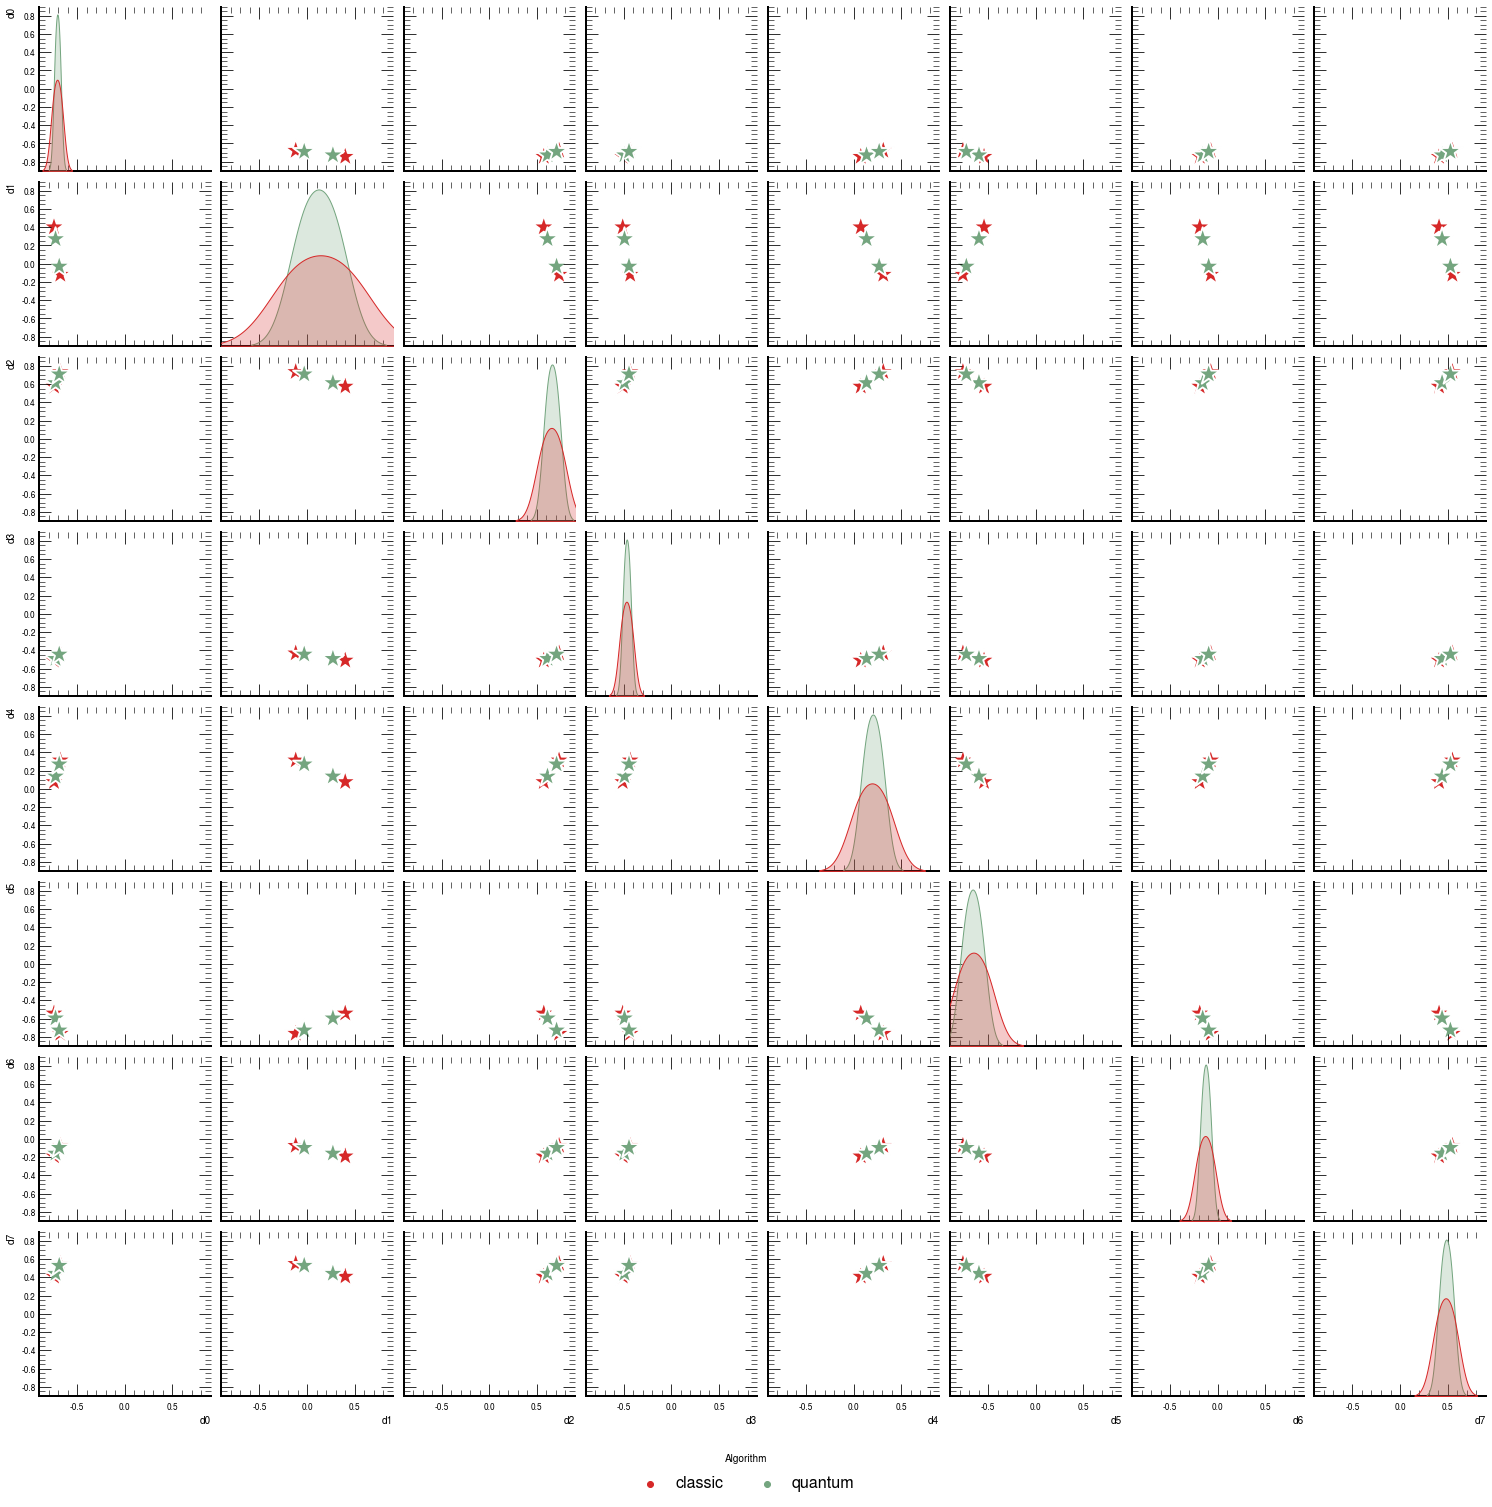

In [21]:
#****************************************#
#           Plot Scatter
#****************************************#
sns.set_style(hep.style.CMS)

plot = sns.pairplot(centroids, hue='algorithm', markers='*', plot_kws={'s': 550}, palette = ['#D62828', '#74A57F'])
val = 0.9
plot.set(xlim=(-val,val))
plot.set(ylim=(-val,val))
sns.move_legend(plot, bbox_to_anchor=(0.5, -0.05), loc="lower center", ncol=2, labelspacing=0.8, fontsize=16, title='Algorithm')
plt.tight_layout()
plt.draw()
plt.savefig(fig_dir+'/center_pair_scatter_classic_vs_quantum.png')

In [15]:
fig_dir

'fig/run_14'